In [2]:
import torch
import pandas as pd
from tqdm.auto import tqdm

/home/hrenduchinta/LM-pretraining/ingenious-env/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def intersection_cnt(folder):
    subsets=[]
    for i in range(0, 225, 25):
        if i==0:
            subsets.append(set(torch.load(folder+"subset_indices_after_step_0.pt").tolist()))
        else:
            subsets.append(set(torch.load(folder+f"subset_indices_after_step_{i}000.pt").tolist()))
    df=pd.DataFrame()
    df["subsets"]=["{}K".format(i) for i in range(0, 225, 25)]
    for i in range(0, 225, 25):
        df["{}K".format(i)]=[0 for j in range(0, 225, 25)]
    df.set_index("subsets", inplace=True)
    pbar=tqdm(range(45))
    for i in range(0, 225, 25):
        for j in range(i, 225, 25):
            df["{}K".format(i)]["{}K".format(j)]=len(subsets[i//25].intersection(subsets[j//25]))
            pbar.update(1)
    return df

In [3]:
def coverage(folder):
    subsets=[]
    for i in range(0, 225, 25):
        if i==0:
            subsets.append(set(torch.load(folder+"subset_indices_after_step_0.pt").tolist()))
        else:
            subsets.append(set(torch.load(folder+f"subset_indices_after_step_{i}000.pt").tolist()))

In [4]:
folder="subsets/random_25percent_bert_25_05_2022_06:08:15/"
subsets=[]
for i in range(0, 225, 25):
    if i==0:
        subsets.append(set(torch.load(folder+"subset_indices_after_step_0.pt").tolist()))
    else:
        subsets.append(set(torch.load(folder+f"subset_indices_after_step_{i}000.pt").tolist()))

In [5]:
print(len(subsets[0]))
print(len((subsets[0].intersection(subsets[1]))))

10385854
2594548


In [6]:
print(len((subsets[0].intersection(subsets[1]).intersection(subsets[2]))))

648115


In [7]:
print(len(((subsets[0].intersection(subsets[1]).intersection(subsets[2]))).intersection(subsets[3])))

162102


In [8]:
print(len((((subsets[0].intersection(subsets[1]).intersection(subsets[2]))).intersection(subsets[3])).intersection(subsets[4])))

40729


In [9]:
print(len(((((subsets[0].intersection(subsets[1]).intersection(subsets[2]))).intersection(subsets[3])).intersection(subsets[4]).intersection(subsets[5]))))

10266


In [10]:
print(len((((((subsets[0].intersection(subsets[1]).intersection(subsets[2]))).intersection(subsets[3])).intersection(subsets[4]).intersection(subsets[5]))).intersection(subsets[6])))

2542


In [11]:
print(len(subsets[0]))
print(len((subsets[0].union(subsets[1]))))
print(len((subsets[0].union(subsets[1]).union(subsets[2]))))
print(len(((subsets[0].union(subsets[1]).union(subsets[2]))).union(subsets[3])))
print(len((((subsets[0].union(subsets[1]).union(subsets[2]))).union(subsets[3])).union(subsets[4])))
print(len(((((subsets[0].union(subsets[1]).union(subsets[2]))).union(subsets[3])).union(subsets[4]).union(subsets[5]))))
print(len((((((subsets[0].union(subsets[1]).union(subsets[2]))).union(subsets[3])).union(subsets[4]).union(subsets[5]))).union(subsets[6])))
print(len(((((((subsets[0].union(subsets[1]).union(subsets[2]))).union(subsets[3])).union(subsets[4]).union(subsets[5]))).union(subsets[6])).union(subsets[7])))
print(len((((((((subsets[0].union(subsets[1]).union(subsets[2]))).union(subsets[3])).union(subsets[4]).union(subsets[5]))).union(subsets[6])).union(subsets[7])).union(subsets[8])))

10385854
18177160
24022707
28403717
31687992
34152079
36000178


# Random Online

In [4]:
folder="subsets/random_25percent_bert_25_05_2022_06:08:15/"
intersection_cnt(folder)

100%|██████████| 45/45 [00:56<00:00,  1.25s/it]


,0K,25K,50K,75K,100K,125K,150K,175K,200K
subsets,,,,,,,,,
0K,10385854,0,0,0,0,0,0,0,0
25K,2594548,10385854,0,0,0,0,0,0,0
50K,2594599,2593823,10385854,0,0,0,0,0,0
75K,2594876,2597266,2595432,10385854,0,0,0,0,0
100K,2596082,2595524,2596190,2595267,10385854,0,0,0,0
125K,2594557,2596358,2597452,2596404,2596711,10385854,0,0,0
150K,2596990,2597299,2596134,2596228,2596812,2596675,10385854,0,0
175K,2596449,2595873,2597459,2596501,2595426,2596236,2596588,10385854,0
200K,2597025,2597300,2598131,2595569,2597361,2596016,2598354,2596280,10385854


# LogDet Layer 6

In [5]:
folder="subsets/logdet_25percent_bert_22_05_2022_21:09:35/"
intersection_cnt(folder)

100%|██████████| 45/45 [01:30<00:00,  2.01s/it]


,0K,25K,50K,75K,100K,125K,150K,175K,200K
subsets,,,,,,,,,
0K,10385854,0,0,0,0,0,0,0,0
25K,2599411,10390000,0,0,0,0,0,0,0
50K,2598554,5950432,10390000,0,0,0,0,0,0
75K,2596854,5828918,6209838,10390000,0,0,0,0,0
100K,2597090,5737634,6156558,6315602,10390000,0,0,0,0
125K,2597194,5670498,6104726,6289190,6385546,10390000,0,0,0
150K,2596033,5640441,6083959,6276327,6381271,6425029,10390000,0,0
175K,2596412,5610992,6053381,6255674,6370512,6421007,6444717,10390000,0
200K,2596830,5605267,6052467,6259505,6380052,6435627,6457882,6473232,10390000


# Graph Cut Layer 6

In [6]:
folder="subsets/gc_25percent_layer6/"
intersection_cnt(folder)

100%|██████████| 45/45 [01:21<00:00,  1.82s/it]


,0K,25K,50K,75K,100K,125K,150K,175K,200K
subsets,,,,,,,,,
0K,10385854,0,0,0,0,0,0,0,0
25K,2592476,10390000,0,0,0,0,0,0,0
50K,2595877,6175841,10390000,0,0,0,0,0,0
75K,2595897,6069425,6281896,10390000,0,0,0,0,0
100K,2596674,5963945,6202424,6283046,10390000,0,0,0,0
125K,2596706,5885406,6138462,6229362,6309305,10390000,0,0,0
150K,2597878,5828657,6068419,6179345,6299165,6330213,10390000,0,0
175K,2596253,5790634,6042366,6146605,6268035,6307954,6349045,10390000,0
200K,2597396,5781841,6037062,6147441,6276182,6320512,6371211,6367991,10390000


# Facility Location Layer 3 (No Warmstart)

In [7]:
folder="subsets/fl_25percent_layer3_bert_26_05_2022_06:17:56/"
intersection_cnt(folder)

100%|██████████| 45/45 [01:11<00:00,  1.59s/it]


,0K,25K,50K,75K,100K,125K,150K,175K,200K
subsets,,,,,,,,,
0K,10385854,0,0,0,0,0,0,0,0
25K,2597860,10390000,0,0,0,0,0,0,0
50K,2596881,4133300,10390000,0,0,0,0,0,0
75K,2598334,4131711,4298474,10390000,0,0,0,0,0
100K,2596901,4133164,4306833,4368875,10390000,0,0,0,0
125K,2597938,4128502,4312432,4383440,4418974,10390000,0,0,0
150K,2599074,4116937,4300579,4373363,4411688,4440859,10390000,0,0
175K,2596973,4143149,4321764,4394682,4432708,4464663,4462787,10390000,0
200K,2595161,4144923,4327121,4402477,4439746,4469811,4469232,4500295,10390000


# Facility Location Layer 6 (No Warmstart)

In [15]:
folder="subsets/fl_25percent_layer6/"
subsets=[]
for i in range(25, 225, 25):
    if i==0:
        subsets.append(set(torch.load(folder+"subset_indices_after_step_0.pt").tolist()))
    else:
        subsets.append(set(torch.load(folder+f"subset_indices_after_step_{i}000.pt").tolist()))
df=pd.DataFrame()
df["subsets"]=["{}K".format(i) for i in range(25, 225, 25)]
for i in range(25, 225, 25):
    df["{}K".format(i)]=[0 for j in range(25, 225, 25)]
df.set_index("subsets", inplace=True)
pbar=tqdm(range(36))
for i in range(25, 225, 25):
    for j in range(25, 225, 25):
        df["{}K".format(i)]["{}K".format(j)]=len(subsets[(i//25)-1].intersection(subsets[(j//25)-1]))
        pbar.update(1)
df

 19%|█▉        | 7/36 [01:07<04:39,  9.64s/it]


,25K,50K,75K,100K,125K,150K,175K,200K
subsets,,,,,,,,
25K,10390000,3659086,3654959,3651731,3651292,3647859,3643875,3648910
50K,3659086,10390000,3854736,3874826,3884285,3884608,3888776,3894229
75K,3654959,3854736,10390000,4056457,4079246,4093204,4101314,4113902
100K,3651731,3874826,4056457,10390000,4207584,4234107,4247906,4262879
125K,3651292,3884285,4079246,4207584,10390000,4304215,4320842,4338530
150K,3647859,3884608,4093204,4234107,4304215,10390000,4371724,4394052
175K,3643875,3888776,4101314,4247906,4320842,4371724,10390000,4428838
200K,3648910,3894229,4113902,4262879,4338530,4394052,4428838,10390000


# Facility Location Layer 9 (No Warmstart)

In [11]:
folder="subsets/fl_25percent_layer9_bert_28_05_2022_04:44:02/"
intersection_cnt(folder)

100%|██████████| 45/45 [00:58<00:00,  1.29s/it]


,0K,25K,50K,75K,100K,125K,150K,175K,200K
subsets,,,,,,,,,
0K,10385854,0,0,0,0,0,0,0,0
25K,2596339,10390000,0,0,0,0,0,0,0
50K,2598100,3306724,10390000,0,0,0,0,0,0
75K,2596746,3288053,3392916,10390000,0,0,0,0,0
100K,2595927,3273742,3394767,3446206,10390000,0,0,0,0
125K,2597798,3262920,3389932,3450209,3506586,10390000,0,0,0
150K,2596475,3237025,3366457,3438192,3506876,3556577,10390000,0,0
175K,2597777,3228802,3363154,3437856,3521217,3578413,3624884,10390000,0
200K,2598354,3200222,3339388,3419022,3505831,3570028,3626102,3686654,10390000


# Facility Location Layer 9 (With Warmstart)

In [10]:
folder="subsets/fl_25percent_layer9_warmstart_bert_30_05_2022_15:43:16/"
intersection_cnt(folder)

100%|██████████| 45/45 [01:00<00:00,  1.35s/it]


,0K,25K,50K,75K,100K,125K,150K,175K,200K
subsets,,,,,,,,,
0K,10390000,0,0,0,0,0,0,0,0
25K,3389216,10390000,0,0,0,0,0,0,0
50K,3395593,3476906,10390000,0,0,0,0,0,0
75K,3397162,3476054,3494979,10390000,0,0,0,0,0
100K,3395021,3475155,3495194,3493634,10390000,0,0,0,0
125K,3397162,3475996,3496397,3494863,3494817,10390000,0,0,0
150K,3395835,3478228,3496200,3495732,3496007,3495133,10390000,0,0
175K,3395781,3478866,3493653,3492484,3493851,3496591,3495338,10390000,0
200K,3398343,3478149,3495074,3494185,3493536,3497500,3493596,3495591,10390000


In [12]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [17]:
step=[]
perplexity=[]
with open("logs/fl_25percent_layer9_bert_logs_28_05_2022_04:44:02/train_logs.log", "r") as f:
    for line in f:
        if "perplexity" in line:
            lst=line.split(" ")
            step.append(int(lst[-3].rstrip(":")))
            perplexity.append(float(lst[-1]))

In [18]:
step_warmstart=[]
perplexity_warmstart=[]
with open("logs/fl_25percent_layer9_warmstart_bert_logs_30_05_2022_15:43:16/train_logs.log", "r") as f:
    for line in f:
        if "perplexity" in line:
            lst=line.split(" ")
            step_warmstart.append(int(lst[-3].rstrip(":")))
            perplexity_warmstart.append(float(lst[-1]))

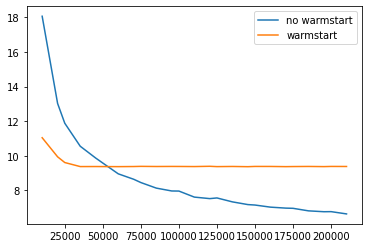

In [20]:
plt.plot(step, perplexity)
plt.plot(step_warmstart, perplexity_warmstart)
plt.legend(["no warmstart", "warmstart"])